<div align="right">
  Christopher Lüken-Winkels, Lukas Blecher
</div>
# Exercise 2
## 2 Data Preparation

In [6]:
#import standard libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import model_selection

In [7]:
digits = load_digits ()
print(digits.keys ()) #Python 3
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [8]:
# filter out all 1's and 7's
# split into train and test data
X_all = data[np.logical_or(target==1,target==7)]
y_all = target[np.logical_or(target==1,target==7)]
X_train, X_test, y_train , y_test = model_selection.train_test_split(digits.data,digits.target,test_size = 0.4,random_state = 0)

In [10]:
#verify 3/2 split:
len(X_train)/len(X_test)

1.4993045897079276

### 2.1 Dimension Reduction

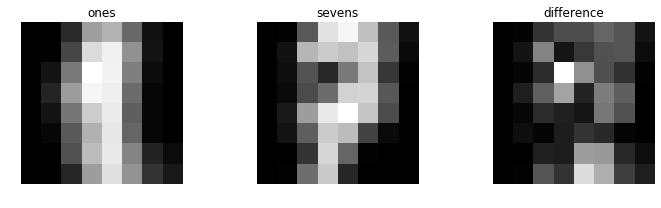

In [21]:
#first look at average of all ones and sevens to identify hot pixels
ones,sevens=images[target==1],images[target==7]
fig = plt.figure(figsize = (10,3))
plt.gray()
plt.subplot('131'); plt.axis('off')
plt.imshow(np.mean(ones,axis=0), interpolation = "nearest")
plt.title('ones')
plt.subplot('132'); plt.axis('off')
plt.imshow(np.mean(sevens,axis=0), interpolation = "nearest")
plt.title('sevens')
plt.subplot('133'); plt.axis('off')
plt.imshow(abs(np.mean(ones,axis=0)-np.mean(sevens,axis=0)), interpolation = "nearest")
plt.title('difference')
fig.tight_layout(); plt.show()

In the difference plot we can se one very bright pixel in particular. It would be smart to take that pixel value as our first feature. For the second feature we can take an also quite bright pixel region in the lower part of the picture. The average of the four brighter pixel might be a good feature